# 1.1回归树概述
```python
class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
```
参数几乎和分分类树一样

# 1.2重要参数和接口
## criterion
回归树衡量分支指标有三种：
* `me`, 使用均方误差。父节点与子节点之间均方误差的差额来进行特征选择，这种方法使用叶子节点的均值来最小化L2损失
* `firedman_me`, 费尔德曼均方误差
* `mae`, 绝对平均误差。使用叶子节点中的值来最小化L1损失

属性中最重要的是`feature_impotances_`,接口中`apply`, `fit`, `predict`, `score`最核心


$$MSE = \frac{1}{N}\sum_{i=1}^{N}(f_i-y_i)^2$$


其中N是样本数量, i是每个数据样本，$f_i$是模型中回归出的值, $y_i$是样本点i实际的数值。
MSE的本质是真是样本与回归结果的差异。在回归树中，MSE不只是分支质量的回归指标，也是最常用的回归树质量指标。**在回归树种追求`MSE`越小越好，但是score返回的是R方，并不是MSE**，R方的公式:


$$R^2 = 1 - \frac{u}{v}$$


$$u = \sum_{i=1}^{N}(f_i-y_i)^2$$


$$v = \sum_{i=1}^{N}(y_i-\hat{y})^2$$


其中，u是残差平方和(MSE*N), v是总平方和，N是总样本数量，i是每一个样本，$f_i$是模型回归出来的值$y_i$是样本点i实际数值标签，$\hat{y}$是真是数据的平均数。R方可以是负数而军方误差永远是正数，但是, 在sklearn中时候用的是负均方误差

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston  # 导入交叉验证方法
from sklearn.model_selection import cross_val_score

In [67]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(  # 进行交叉验证
    regressor,  # 实例化后的模型
    boston.data,  # 完整的特征矩阵
    boston.target,  #完整的标签
    cv=10,  # 要分的分数
    scoring='neg_mean_squared_error'  # 选择衡量指标neg_mean_squared_error -- MSE
)

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [68]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [69]:
rng = np.random.RandomState(1)  # 随机数种子
X = np.sort(5 * rng.rand(80, 1), axis=0)  # 生成随机数
y = np.sin(X).ravel()

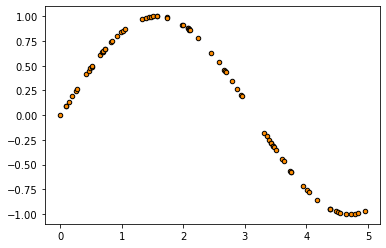

In [70]:
plt.scatter(X, y, s=20, edgecolors='black', c="darkorange", label='data')

In [71]:
y[::5] += 3 * (0.5 - rng.rand(16))  # 增加噪声

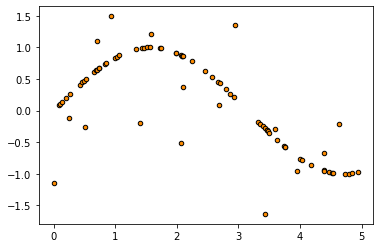

In [72]:
plt.scatter(X, y, s=20, edgecolors='black', c="darkorange", label='data')

In [73]:
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X,y)
reg2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [75]:
y1 = reg1.predict(X_test)
y2 = reg2.predict(X_test)

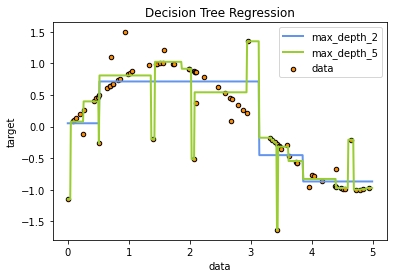

In [76]:
plt.figure()
plt.scatter(X, y, s=20, edgecolors='black', c="darkorange", label='data')
plt.plot(X_test, y1, color='cornflowerblue', label='max_depth_2', linewidth=2)
plt.plot(X_test, y2, color='yellowgreen', label='max_depth_5', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()